# Description:

The Objective of the dataset is to predict the selling price based on the basic information given for the cars in the dataset. The dataset contains several different car along with some other variable and one target variable, selling_price. The Car's Details or features like year, km_driven, fuel, seller_type, transmission and owner are given in the Dataset.



# Step 0 :Importing Libraries and Dataset

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

In [62]:
#Importing DataSet
df = pd.read_csv("Car Dataset.csv")

# Step 1: Descriptive Statistics

In [63]:
# Previewing Data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [64]:
#Checking number of rows and column in dataset
df.shape

(4340, 8)

In [65]:
#Checking for data types of the column in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [66]:
#Checking for Missing in the dataset
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

## Observations:
1. There are Total of 4340 records and 8 Features in the dataset.
2. Each Feature can be either of integer or object datatype.
3. There are no zero NaN values in the dataset.
4. The selling_price is the target variable in the dataset. 

# Step 2: Data Visualization

array([[<Axes: xlabel='year', ylabel='year'>,
        <Axes: xlabel='selling_price', ylabel='year'>,
        <Axes: xlabel='km_driven', ylabel='year'>],
       [<Axes: xlabel='year', ylabel='selling_price'>,
        <Axes: xlabel='selling_price', ylabel='selling_price'>,
        <Axes: xlabel='km_driven', ylabel='selling_price'>],
       [<Axes: xlabel='year', ylabel='km_driven'>,
        <Axes: xlabel='selling_price', ylabel='km_driven'>,
        <Axes: xlabel='km_driven', ylabel='km_driven'>]], dtype=object)

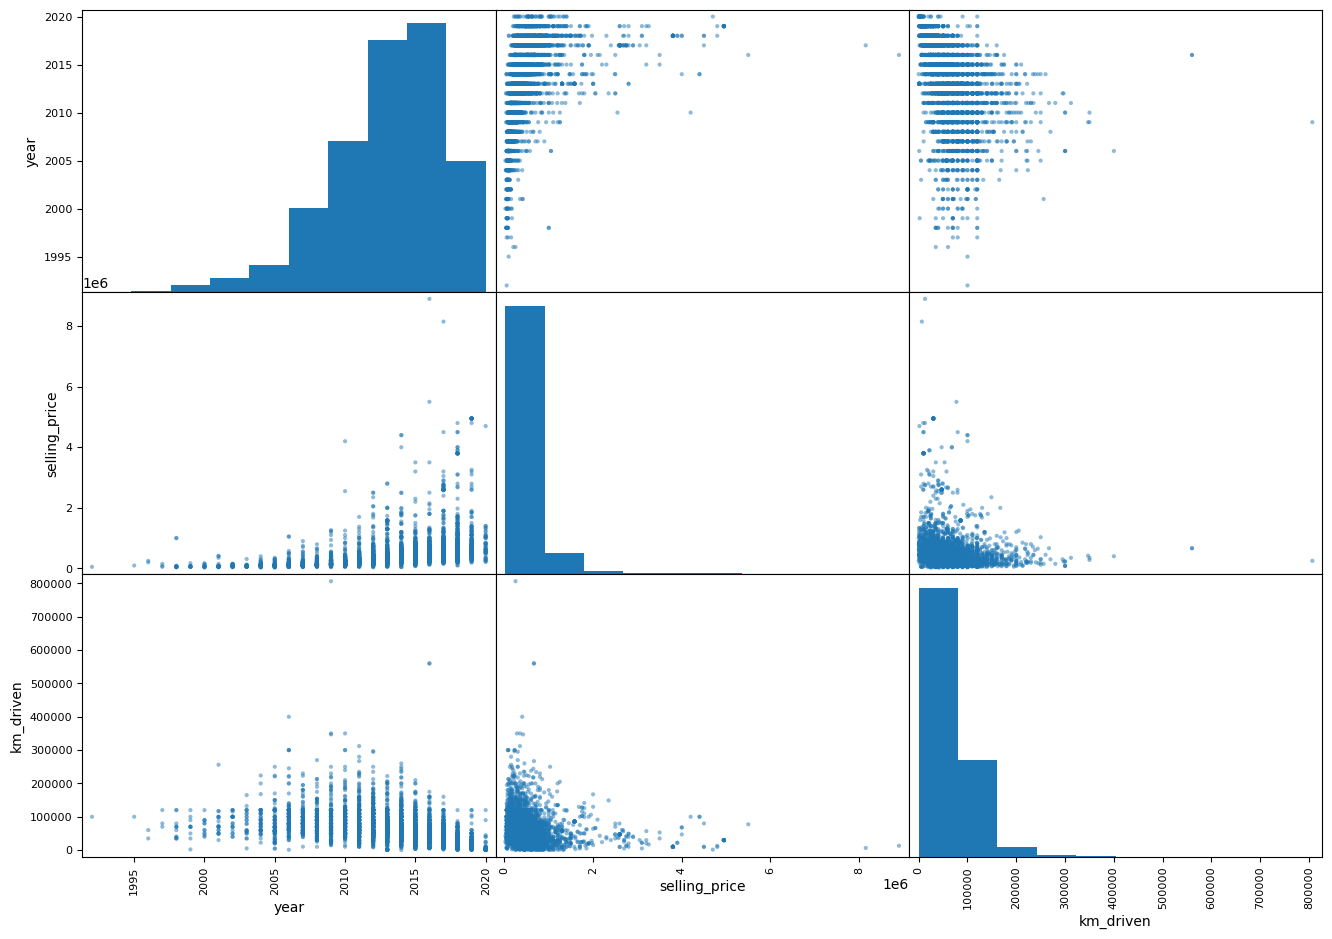

In [67]:
#Scatter Plot Matrix
pd.plotting.scatter_matrix(df, figsize = (16, 11))

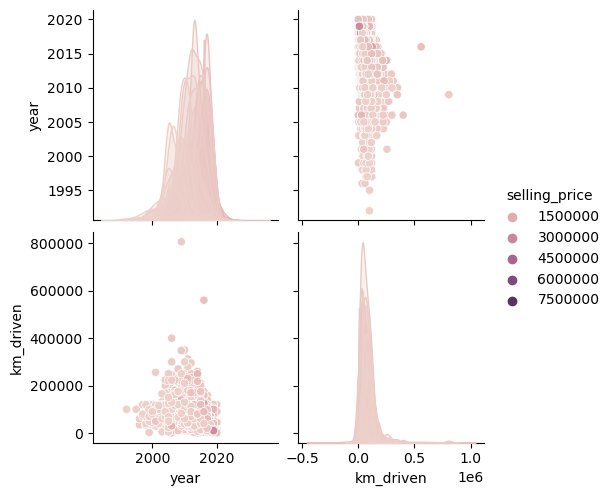

In [68]:
# Pairplot 
sns.pairplot(data = df, hue = 'selling_price')
plt.show()

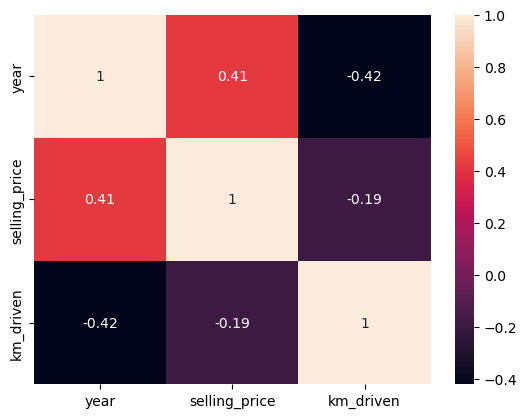

In [69]:
# Heatmap
sns.heatmap(df.corr(), annot = True)
plt.show()

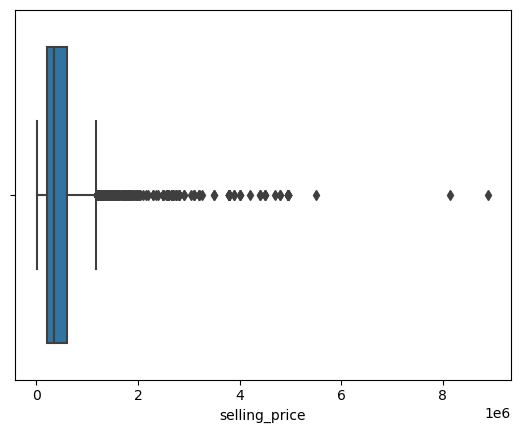

In [70]:
#Visualizing Outlier in the selling_price using boxplot
sns.boxplot(x=df['selling_price'])
plt.show()

# Step 3: Data Preprocessing 

In [71]:
# Loops used for showing all the duplicated rows available in the dataset
for i in df:
    if df.duplicated().any():
        print(df[df.duplicated()])
        break # exit the loop after finding duplicates
else: # execute if the loop completes without finding duplicates
    print(f"{df.columns}\n No Duplicate Values Found")

                                 name  year  selling_price  km_driven    fuel  \
13                      Maruti 800 AC  2007          60000      70000  Petrol   
14           Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
15               Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
16             Datsun RediGO T Option  2017         250000      46000  Petrol   
17              Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   
...                               ...   ...            ...        ...     ...   
4307                 Mahindra Xylo H4  2019         599000      15000  Diesel   
4308              Maruti Alto 800 LXI  2018         200000      35000  Petrol   
4309                 Datsun GO Plus T  2017         350000      10171  Petrol   
4310  Renault Duster 110PS Diesel RxL  2015         465000      41123  Diesel   
4311          Toyota Camry Hybrid 2.5  2017        1900000      20118  Petrol   

     seller_type transmissi

In [72]:
# Checking if any duplicate values are present in the dataset
df.duplicated().any()

True

In [73]:
# Summing the number of rows having duplicate values
df.duplicated().sum()

763

In [74]:
# Dropping the duplicate rows in the dataset
df.drop_duplicates(inplace=True)

In [75]:
# Checking the new dataframe after removing duplicates.
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [76]:
# Determining the dimensions of the new dataset.
df.shape

(3577, 8)

In [77]:
# Sorting the dataframe by selling_price in descending order to get the outliers on top
df = df.sort_values(by='selling_price', ascending=False).reset_index()

In [78]:
df.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,3872,Audi RS7 2015-2019 Sportback Performance,2016,8900000,13000,Petrol,Dealer,Automatic,First Owner
1,89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner
2,3969,Mercedes-Benz GLS 2016-2020 350d 4MATIC,2016,5500000,77350,Diesel,Dealer,Automatic,First Owner
3,555,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
4,3883,BMW 5 Series 520d Luxury Line,2019,4800000,12999,Diesel,Dealer,Automatic,First Owner


In [79]:
# Droping the top 3 rows having outlier values in it
df = df[3:].reset_index(drop=True)

In [80]:
#Checking for the updated dataframe
df.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,555,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
1,3883,BMW 5 Series 520d Luxury Line,2019,4800000,12999,Diesel,Dealer,Automatic,First Owner
2,3453,BMW 5 Series 520d Luxury Line,2018,4800000,9422,Diesel,Individual,Automatic,First Owner
3,963,Audi A5 Sportback,2020,4700000,1500,Diesel,Individual,Automatic,First Owner
4,101,Mercedes-Benz E-Class Exclusive E 200 BSIV,2018,4500000,9800,Petrol,Dealer,Automatic,First Owner


In [81]:
# Reseting the index number of each row in a dataframe
df.index = pd.RangeIndex(start=1, stop=len(df)+1, step=1)

In [82]:
# Droping Index Column in the DataFrame
df.drop(columns='index', inplace=True)

In [83]:
# Checking the index number in the dataframe
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
2,BMW 5 Series 520d Luxury Line,2019,4800000,12999,Diesel,Dealer,Automatic,First Owner
3,BMW 5 Series 520d Luxury Line,2018,4800000,9422,Diesel,Individual,Automatic,First Owner
4,Audi A5 Sportback,2020,4700000,1500,Diesel,Individual,Automatic,First Owner
5,Mercedes-Benz E-Class Exclusive E 200 BSIV,2018,4500000,9800,Petrol,Dealer,Automatic,First Owner
...,...,...,...,...,...,...,...,...
3570,Tata Nano LX SE,2012,35000,35000,Petrol,Individual,Manual,Third Owner
3571,Tata Nano Std BSII,2009,35000,50000,Petrol,Individual,Manual,Third Owner
3572,Maruti 800 EX,2004,30000,60000,Petrol,Individual,Manual,Third Owner
3573,Ford Ikon 1.4 ZXi,2000,22000,42743,Petrol,Dealer,Manual,Third Owner


# Step 4: One Hot Encoding 

In [84]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [85]:
# Selecting the categorical columns for one-hot encoding
columns_encoded = ['fuel', 'seller_type', 'transmission','owner']

In [86]:
# Performing one-hot encoding on the selected columns
df_encoded = pd.get_dummies(df, columns=columns_encoded)

In [87]:
# Saving the encoded dataframe to a new CSV file
df_encoded.to_csv('Car Dataset Encoded.csv', index=False)

In [88]:
df_encoded

,name,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1,BMW X5 xDrive 30d xLine,2019,4950000,30000,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
2,BMW 5 Series 520d Luxury Line,2019,4800000,12999,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
3,BMW 5 Series 520d Luxury Line,2018,4800000,9422,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0
4,Audi A5 Sportback,2020,4700000,1500,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0
5,Mercedes-Benz E-Class Exclusive E 200 BSIV,2018,4500000,9800,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,Tata Nano LX SE,2012,35000,35000,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3571,Tata Nano Std BSII,2009,35000,50000,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3572,Maruti 800 EX,2004,30000,60000,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3573,Ford Ikon 1.4 ZXi,2000,22000,42743,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1


In [89]:
# Display the first few rows of the encoded dataframe
print(df_encoded.head())

                                         name  year  selling_price  km_driven  \
1                     BMW X5 xDrive 30d xLine  2019        4950000      30000   
2               BMW 5 Series 520d Luxury Line  2019        4800000      12999   
3               BMW 5 Series 520d Luxury Line  2018        4800000       9422   
4                           Audi A5 Sportback  2020        4700000       1500   
5  Mercedes-Benz E-Class Exclusive E 200 BSIV  2018        4500000       9800   

   fuel_CNG  fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  \
1         0            1              0         0            0   
2         0            1              0         0            0   
3         0            1              0         0            0   
4         0            1              0         0            0   
5         0            0              0         0            1   

   seller_type_Dealer  seller_type_Individual  seller_type_Trustmark Dealer  \
1                   1                

In [90]:
# Applying Standard Scaler for numeric Columns
scaler = StandardScaler()

In [91]:
# List of numerical feature columns to scale
scaled_columns = ['year', 'km_driven']

In [92]:
# Apply StandardScaler to the numerical features
df_encoded[scaled_columns] = scaler.fit_transform(df_encoded[scaled_columns])

# Step 5: Data Modelling

In [93]:
df_encoded.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [94]:
# Selecting Features for training and testing
X = df_encoded.iloc[:, [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]].values
Y = df_encoded.iloc[:, 2].values

In [95]:
# Splitting X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [96]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (2859, 17)
X_test shape: (715, 17)
Y_train shape: (2859,)
Y_test shape: (715,)


### Random Forest Regression Model

In [97]:
# Random Forest Model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

In [98]:
# Fit the model for training data
random_forest.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [99]:
# Make prediction on the test data
rand_pred = random_forest.predict(X_test)

### Gradient Boosting Model

In [100]:
# Initializing the Gradient Boosting Regressor
gradient_boost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [101]:
# Fitting the training data in the model
gradient_boost.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=42)

In [102]:
# Making predictions on the test data
grad_pred = gradient_boost.predict(X_test)

### Support Vector Regressor Machine Model

In [103]:
# Initializing the Support Vector Regressor
svr_model = SVR(C=1.0, epsilon=0.2)

In [104]:
# Fitting the model on the training data
svr_model.fit(X_train, Y_train)

SVR(epsilon=0.2)

In [105]:
# Make predictions on the test data
svr_pred = svr_model.predict(X_test)

### Linear Regression Model

In [106]:
# Initialize the Linear Regression model
linear_regression = LinearRegression()

In [107]:
# Fit the model on the training data
linear_regression.fit(X_train, Y_train)

LinearRegression()

In [108]:
# Make predictions on the test data
lr_pred = linear_regression.predict(X_test)

# Step 6: Model Evaluation 

In [111]:
# Calculating Mean Squared Error (MSE) for random forest Regression 
rf_mse = mean_squared_error(Y_test, rand_pred)
print(f"Mean Sqaured Error(MSE) for Random Forest Regression: {rf_mse: .2f}\n")

# Calculate Mean Squared Error (MSE) for Gradient Boosting Regression
gb_mse = mean_squared_error(Y_test, grad_pred)
print(f"Mean Squared Error(MSE) for Gradient Boosting Regression: {gb_mse: .2f}\n")

# Calculate Mean Squared Error (MSE) for Support Vector Regression 
svr_mse = mean_squared_error(Y_test, svr_pred)
print(f"Mean Squared Error(MSE) for Support Vector Regression: {svr_mse: .2f}\n")

# Calculate Mean Squared Error (MSE) for Linear Regression
lr_mse = mean_squared_error(Y_test, lr_pred)
print(f"Mean Squared Error(MSE) for Linear Regression: {lr_mse: .2f}")

Mean Sqaured Error(MSE) for Random Forest Regression:  124317031094.60

Mean Squared Error(MSE) for Gradient Boosting Regression:  100254290955.84

Mean Squared Error(MSE) for Support Vector Regression:  263283494440.27

Mean Squared Error(MSE) for Linear Regression:  56255796271006909098689959773077504.00


In [112]:
# Calculating R-Squared Score for Random Forest Regression 
rf_r2 = r2_score(Y_test, rand_pred)
print(f"R-Squared Score for Random Forest Regression: {rf_r2: .2f}\n")

# Calculating R-Squared Score for Gradient Boosting Regression 
gb_r2 = r2_score(Y_test, grad_pred)
print(f"R-Squared Score for Gradient Boosting Regression: {gb_r2: .2f}\n")

# Calculating R-Squared Score for Support Vector Regression
svr_r2 = r2_score(Y_test, svr_pred)
print(f"R-Squared Score for Support Vector Regression: {svr_r2: .2f}\n")

# Calculating R-Squared Score for Linear Regression
lr_r2 = r2_score(Y_test, lr_pred)
print(f"R-Squared Score for Linear Regression {lr_r2: .2f}")

R-Squared Score for Random Forest Regression:  0.49

R-Squared Score for Gradient Boosting Regression:  0.59

R-Squared Score for Support Vector Regression: -0.09

R-Squared Score for Linear Regression -232099344511946589208576.00


In [113]:
# Calculating Root Mean Squared Error (RMSE) for random forest Regression 
rf_rmse = mean_squared_error(Y_test, rand_pred, squared=False)
print(f"Root Mean Sqaured Error(RMSE) for Random Forest Regression: {rf_rmse: .2f}\n")

# Calculating Root Mean Squared Error (RMSE) for Gradient Boosting Regression
gb_rmse = mean_squared_error(Y_test, grad_pred, squared=False)
print(f"Root Mean Squared Error(RMSE) for Gradient Boosting Regression: {gb_rmse: .2f}\n")

# Calculating Root Mean Squared Error (RMSE) for Support Vector Regression 
svr_rmse = mean_squared_error(Y_test, svr_pred, squared=False)
print(f"Root Mean Squared Error(RMSE) for Support Vector Regression: {svr_rmse: .2f}\n")

# Calculating Root Mean Squared Error (RMSE) for Linear Regression
lr_rmse = mean_squared_error(Y_test, lr_pred, squared=False)
print(f"Root Mean Squared Error(RMSE) for Linear Regression: {lr_rmse: .2f}")

Root Mean Sqaured Error(RMSE) for Random Forest Regression:  352586.20

Root Mean Squared Error(RMSE) for Gradient Boosting Regression:  316629.58

Root Mean Squared Error(RMSE) for Support Vector Regression:  513111.58

Root Mean Squared Error(RMSE) for Linear Regression:  237183043810064352.00


In [114]:
# Calculating Mean Absolute Error (MAE) for random forest Regression 
rf_mae = mean_absolute_error(Y_test, rand_pred)
print(f"Mean Absolute Error(MAE) for Random Forest Regression: {rf_mae: .2f}\n")

# Calculating Mean Absolute Error (MAE) for Gradient Boosting Regression
gb_mae = mean_absolute_error(Y_test, grad_pred)
print(f"Mean Absolute Error(MAE) for Gradient Boosting Regression: {gb_mae: .2f}\n")

# Calculating Mean Absolute Error (MAE) for Support Vector Regression 
svr_mae = mean_absolute_error(Y_test, svr_pred)
print(f"Mean Absolute Error(MAE) for Support Vector Regression: {svr_mae: .2f}\n")

# Calculating Mean Absolute Error (MAE) for Linear Regression
lr_mae = mean_absolute_error(Y_test, lr_pred)
print(f"Mean Absolute Error(MAE) for Linear Regression: {lr_mae: .2f}")

Mean Absolute Error(MAE) for Random Forest Regression:  195893.86

Mean Absolute Error(MAE) for Gradient Boosting Regression:  177474.33

Mean Absolute Error(MAE) for Support Vector Regression:  293593.65

Mean Absolute Error(MAE) for Linear Regression:  8870142915861992.00


In [118]:
# Calculating Mean Absolute Percentage Error (MAPE) for Random Forest Regression 
rf_mape = mean_absolute_percentage_error (Y_test, rand_pred)
print(f"Mean Absolute Percentage Error(MAPE) for Random Forest Regression: {rf_mape: .2f}% \n")

# Calculating Mean Absolute Percentage Error (MAPE) for Gradient Boosting Regression
gb_mape = mean_absolute_percentage_error(Y_test, grad_pred)
print(f"Mean Absolute Percentage Error(MAPE) for Gradient Boosting Regression: {gb_mape: .2f}% \n")

# Calculating Mean Absolute Percentage Error (MAPE) for Support Vector Regression 
svr_mape = mean_absolute_percentage_error(Y_test, svr_pred)
print(f"Mean Absolute Percentage Error(MAPE) for Support Vector Regression: {svr_mape: .2f}% \n")

# Calculating Mean Absolute Percentage Error (MAPE) for Linear Regression
lr_mape = mean_absolute_percentage_error(Y_test, lr_pred)
print(f"Mean Absolute Percentage Error(MAPE) for Linear Regression: {lr_mape: .2f}%")

Mean Absolute Percentage Error(MAPE) for Random Forest Regression:  0.49% 

Mean Absolute Percentage Error(MAPE) for Gradient Boosting Regression:  0.45% 

Mean Absolute Percentage Error(MAPE) for Support Vector Regression:  0.89% 

Mean Absolute Percentage Error(MAPE) for Linear Regression:  28613364244.68%
